In [1]:
from pyscenic.rss import regulon_specificity_scores

In [2]:
from pyscenic.plotting import plot_rss
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pyscenic.binarization import binarize
import scanpy as sc
from adjustText import adjust_text

In [3]:
adata_scenic = sc.read("/home/spuccio/isilon/spuccio/SP028_Autoimmunity/h5_files/CD4/CD4_res06_cariplo.h5ad")

In [9]:
auc_mtx = pd.read_csv("/home/spuccio/data/auc_mtx_CD4_imputed.csv",header=0,sep=",")

In [17]:
tmp1 = pd.merge(adata_scenic.obs['desc_0.6'],auc_mtx.set_index(['Cell']),left_index=True, right_index=True)

In [13]:
tmp2 = pd.merge(adata_scenic.obs['TumorType'],auc_mtx.set_index(['Cell']),left_index=True, right_index=True)

In [25]:
tmp3 = pd.merge(adata_scenic.obs[['desc_0.6','TumorType']],auc_mtx.set_index(['Cell']),left_index=True, right_index=True)

In [23]:
tmp1 = tmp1.set_index(['desc_0.6'])

In [20]:
tmp2 = tmp2.set_index(['TumorType'])

In [28]:
tmp3 = auc_mtx.set_index([adata_scenic.obs[['desc_0.6','TumorType']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)])

In [136]:
rss_cellType_tmp1 = regulon_specificity_scores( tmp1, tmp1.index)

### RSS panel plot with all cell types

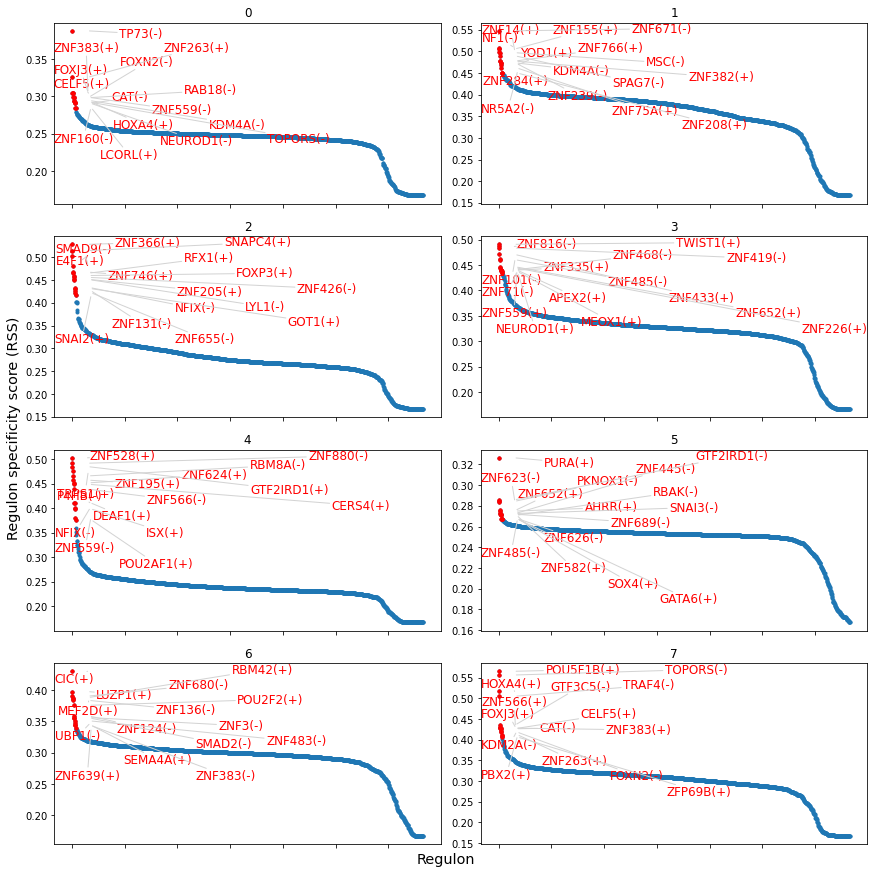

In [90]:
from adjustText import adjust_text
cats = sorted(list(set(tmp1.index)))
fig = plt.figure(figsize=(12, 12))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType_tmp1.T[c]
    ax = fig.add_subplot(4,2,num)
    plot_rss(rss_cellType_tmp1, c, top_n=15, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("/home/spuccio/data/regulon_imputed1.pdf", dpi=600, bbox_inches = "tight")
plt.show()

### Select the top 20 regulons from each cell type

In [93]:
topreg = []
for i,c in enumerate(cats):
    topreg.extend(
        list(rss_cellType_tmp1.T[c].sort_values(ascending=False)[:20].index)
    )
topreg = list(set(topreg))

,ACAA1(-),ACO1(+),ADNP2(-),AEBP2(+),AEBP2(-),AHCTF1(+),AHR(+),AHR(-),AHRR(+),AHRR(-),...,ZSCAN29(+),ZSCAN29(-),ZSCAN30(+),ZSCAN30(-),ZSCAN9(+),ZXDA(+),ZXDA(-),ZXDB(-),ZXDC(+),ZXDC(-)
desc_0.6,,,,,,,,,,,,,,,,,,,,,
3,0.107589,0.0,0.009087,0.064822,0.010231,0.0,0.043323,0.030211,0.010149,0.061701,...,0.0,0.0,0.042462,0.024699,0.0,0.039685,0.009424,0.0,0.062681,0.031614
1,0.134034,0.0,0.013761,0.057722,0.011960,0.0,0.041091,0.033037,0.004011,0.084581,...,0.0,0.0,0.051779,0.027926,0.0,0.061319,0.007910,0.0,0.062146,0.018837
3,0.113638,0.0,0.008474,0.054587,0.015845,0.0,0.033519,0.034015,0.006743,0.064361,...,0.0,0.0,0.042726,0.025357,0.0,0.043586,0.012287,0.0,0.057305,0.025489
1,0.118469,0.0,0.007721,0.055970,0.025974,0.0,0.023881,0.035922,0.004011,0.074162,...,0.0,0.0,0.040488,0.022196,0.0,0.053906,0.014613,0.0,0.048221,0.021142
3,0.108880,0.0,0.008806,0.061411,0.010434,0.0,0.042080,0.029787,0.008835,0.049634,...,0.0,0.0,0.039721,0.023777,0.0,0.032663,0.010575,0.0,0.062021,0.027333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.121475,0.0,0.009699,0.055970,0.028496,0.0,0.028407,0.036603,0.006535,0.077218,...,0.0,0.0,0.045769,0.026016,0.0,0.064971,0.012366,0.0,0.064787,0.022459
3,0.101337,0.0,0.023356,0.065376,0.021255,0.0,0.028687,0.024620,0.011255,0.042772,...,0.0,0.0,0.031070,0.025160,0.0,0.028833,0.015442,0.0,0.050453,0.024172
5,0.114947,0.0,0.010452,0.056708,0.026646,0.0,0.023286,0.032948,0.008109,0.069328,...,0.0,0.0,0.041368,0.026411,0.0,0.056921,0.016018,0.0,0.053753,0.024172


In [102]:
auc_mtx_Z = pd.DataFrame( index=tmp1.index )
for col in list(tmp1.columns):
    auc_mtx_Z[ col ] = ( tmp1[col] - tmp1[col].mean()) / tmp1[col].std(ddof=0)

### Generate a heatmap

In [94]:
def palplot(pal, names, colors=None, size=1):
    n = len(pal)
    f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    colors = n * ['k'] if colors is None else colors
    for idx, (name, color) in enumerate(zip(names, colors)):
        ax.text(0.0+idx, 0.0, name, color=color, horizontalalignment='center', verticalalignment='center')
    return f

In [96]:
colors = sns.color_palette('bright',n_colors=len(cats) )
colorsd = dict( zip( cats, colors ))
colormap = [ colorsd[x] for x in tmp1.index ]

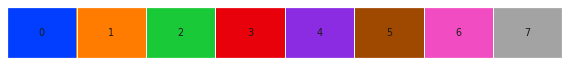

In [97]:
import numpy as np
import matplotlib as mpl
sns.set()
sns.set(font_scale=0.8)
fig = palplot( colors, cats, size=1.0)
plt.savefig("/home/spuccio/data/regulon_scale_imputed.pdf", dpi=600, bbox_inches = "tight")

In [103]:
auc_mtx_Z[topreg]

,KDM2A(-),ZNF680(-),ZNF284(+),ZNF880(-),ZNF382(+),ZNF136(-),SMAD2(-),FOXP3(+),GOT1(+),ZNF566(+),...,UBP1(-),HOXA4(+),ZNF483(-),SNAPC4(+),GTF2IRD1(+),ZNF624(+),MSI1(+),ZNF32(-),TOPORS(-),ZNF689(-)
desc_0.6,,,,,,,,,,,,,,,,,,,,,
3,-0.607744,0.908867,0.087859,-0.223030,-0.027466,0.742055,0.861993,-0.216879,-0.424900,-0.457426,...,1.037481,-0.637397,0.083299,-0.354904,-0.167972,-0.270412,0.183781,-0.352647,-0.568339,-0.436052
1,-0.607744,0.619834,0.509510,-0.354195,1.325079,-0.990030,-0.261579,-0.543522,-0.404803,-0.457426,...,-0.432366,-0.637397,-0.765839,-0.354904,-0.167972,-0.270412,1.379172,-0.352647,-0.568339,-0.436052
3,-0.607744,-0.187051,1.060900,-0.354195,-0.035937,-0.110425,0.616850,-0.543522,-0.424900,-0.457426,...,1.287184,-0.637397,-0.038704,-0.354904,-0.167972,-0.270412,0.514736,-0.352647,-0.568339,-0.436052
1,-0.607744,-0.680815,0.585191,-0.354195,-0.538552,-0.990030,0.044850,-0.543522,-0.424900,-0.457426,...,-0.176987,1.203778,-0.409592,-0.354904,-0.167972,-0.270412,0.875329,-0.352647,1.658378,-0.436052
3,-0.607744,2.257688,-1.133848,-0.001060,-0.112176,1.497663,0.718993,1.361241,-0.173684,-0.457426,...,1.502838,-0.637397,0.737233,-0.354904,-0.167972,-0.270412,-1.174618,-0.352647,-0.568339,-0.075491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,-0.607744,-0.680815,0.531133,-0.354195,0.060068,-0.463042,0.181040,-0.543522,-0.424900,1.697638,...,-0.063485,2.688774,-0.399832,-0.354904,-0.167972,-0.270412,1.142069,-0.352647,1.638931,-0.436052
3,-0.607744,-0.680815,-1.133848,0.402522,-1.492957,1.013299,-0.717817,2.671749,0.961814,-0.457426,...,-0.421015,-0.637397,-0.209507,0.765869,-0.167972,-0.270412,-1.678461,-0.352647,-0.568339,2.184026
5,-0.607744,-0.680815,-0.636516,-0.354195,-0.820921,-0.036802,0.712184,-0.543522,-0.424900,-0.457426,...,0.424572,1.653113,-0.263189,-0.354904,-0.167972,-0.270412,0.944484,-0.352647,0.637394,-0.436052


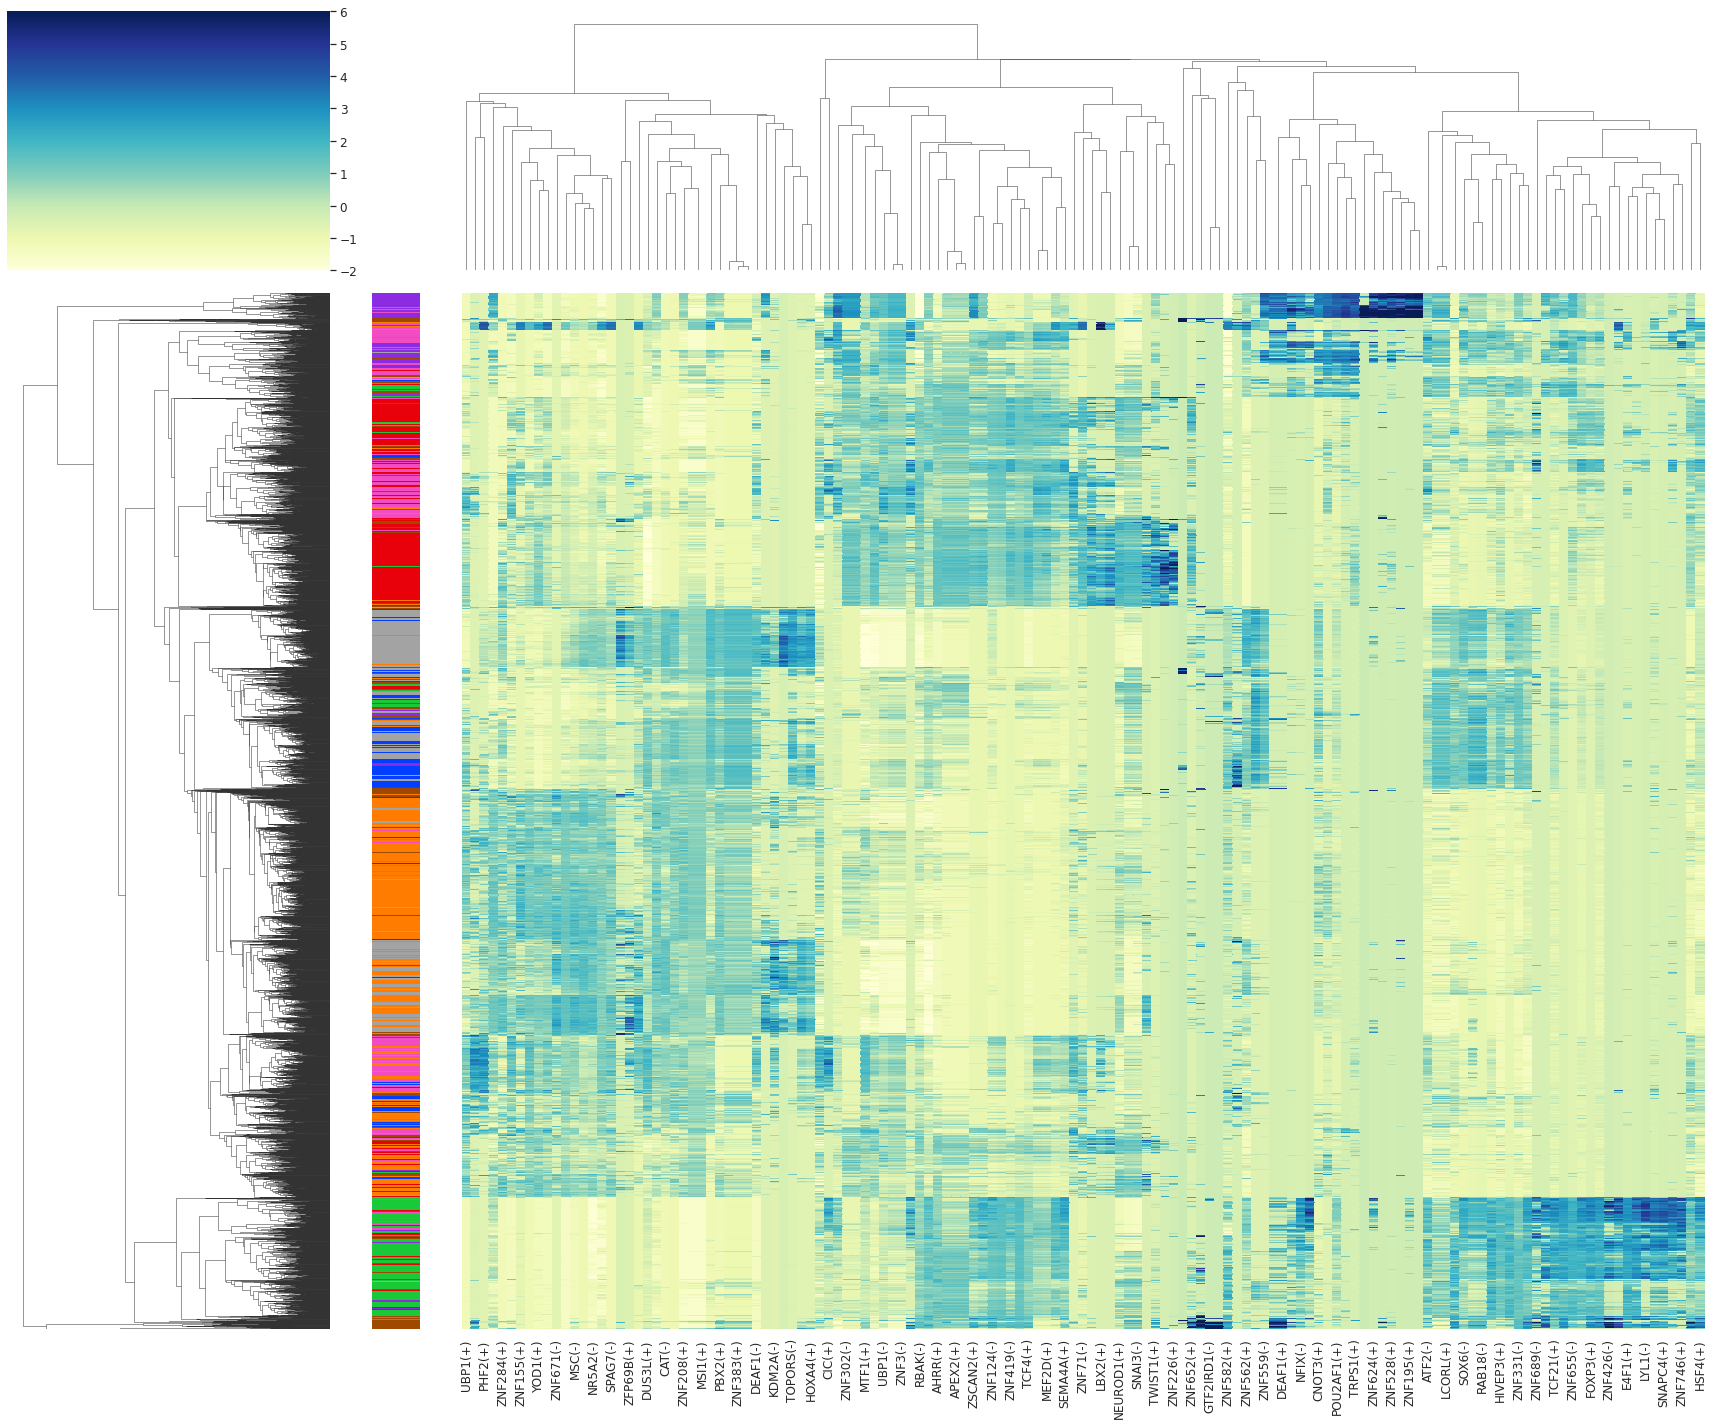

In [135]:
sns.set(font_scale=1.1)
g = sns.clustermap(auc_mtx_Z[topreg],  linecolor='gray',
    yticklabels=False, vmin=-2, vmax=6, row_colors=colormap,
    cmap="YlGnBu", figsize=(24,20) )
g.cax.set_visible(True)
g.ax_heatmap.set_ylabel('')
g.ax_heatmap.set_xlabel('')
plt.savefig("/home/spuccio/data/regulon_imputed_3.pdf", dpi=600, bbox_inches = "tight")

In [57]:
del tmp3['Cell']

In [58]:
rss_cellType_tmp3 = regulon_specificity_scores( tmp3, tmp3.index)
rss_cellType_tmp3

,ACAA1(-),ACO1(+),ADNP2(-),AEBP2(+),AEBP2(-),AHCTF1(+),AHR(+),AHR(-),AHRR(+),AHRR(-),...,ZSCAN29(+),ZSCAN29(-),ZSCAN30(+),ZSCAN30(-),ZSCAN9(+),ZXDA(+),ZXDA(-),ZXDB(-),ZXDC(+),ZXDC(-)
3_IBD,0.308845,NaN,0.279984,0.330668,0.273365,NaN,0.339344,0.303249,0.400114,0.299855,...,NaN,NaN,0.313451,0.304070,NaN,0.306403,0.283904,NaN,0.323461,0.328913
1_IBD,0.386106,NaN,0.309285,0.360113,0.368006,NaN,0.386075,0.394000,0.270163,0.400613,...,NaN,NaN,0.399103,0.346315,NaN,0.408647,0.322777,NaN,0.393835,0.363215
5_IBD,0.226944,NaN,0.214573,0.225804,0.220492,NaN,0.231632,0.228157,0.236533,0.227159,...,NaN,NaN,0.228907,0.223476,NaN,0.230014,0.217371,NaN,0.228879,0.227022
6_IBD,0.291806,NaN,0.295713,0.289121,0.279096,NaN,0.293923,0.289096,0.266218,0.282054,...,NaN,NaN,0.287588,0.301381,NaN,0.260681,0.288935,NaN,0.287012,0.303387
2_IBD,0.178291,NaN,0.177634,0.178607,0.177733,NaN,0.178739,0.178059,0.183655,0.177416,...,NaN,NaN,0.178086,0.179359,NaN,0.176761,0.178181,NaN,0.178341,0.179611
0_IBD,0.204072,NaN,0.195647,0.200892,0.203757,NaN,0.201581,0.206231,0.197005,0.204612,...,NaN,NaN,0.204253,0.203081,NaN,0.202990,0.200980,NaN,0.203554,0.203884
4_IBD,0.174631,NaN,0.177026,0.175217,0.173713,NaN,0.175189,0.174120,0.174366,0.174671,...,NaN,NaN,0.174307,0.174772,NaN,0.174273,0.174391,NaN,0.175102,0.175421
7_IBD,0.245091,NaN,0.215940,0.238204,0.253657,NaN,0.240368,0.249613,0.175657,0.251235,...,NaN,NaN,0.248187,0.215116,NaN,0.257117,0.223009,NaN,0.249869,0.230970
2_CRC,0.264293,NaN,0.341054,0.278406,0.293039,NaN,0.258073,0.256244,0.336031,0.250218,...,NaN,NaN,0.254884,0.295830,NaN,0.232427,0.322212,NaN,0.253689,0.279285
5_CRC,0.204706,NaN,0.229586,0.206610,0.212900,NaN,0.203277,0.207141,0.224456,0.204634,...,NaN,NaN,0.204962,0.215039,NaN,0.209506,0.222862,NaN,0.199003,0.202465


from adjustText import adjust_text
cats = sorted(list(set(tmp3.index)))
fig = plt.figure(figsize=(14, 14))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType_tmp3.T[c]
    ax = fig.add_subplot(8,2,num)
    plot_rss(rss_cellType_tmp3, c, top_n=15, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("/home/spuccio/data/regulon_imputed2.pdf", dpi=600, bbox_inches = "tight")
plt.show()

### Cluster 0 - 1

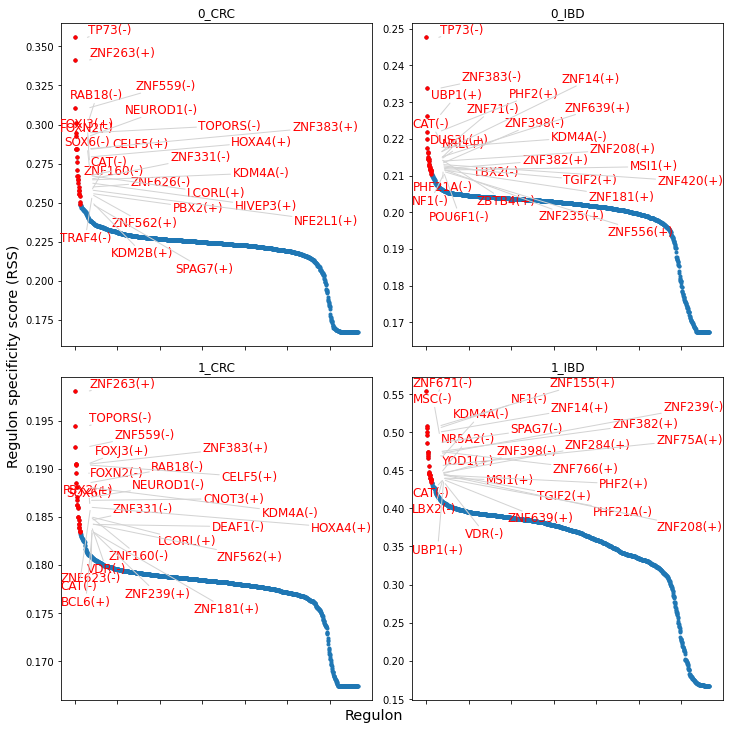

In [82]:
from adjustText import adjust_text
cats = sorted(list(set(rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "0_IBD") | (rss_cellType_tmp3.index == "0_CRC") | (rss_cellType_tmp3.index == "1_IBD") | (rss_cellType_tmp3.index == "1_CRC")].index)))
fig = plt.figure(figsize=(10, 10))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "0_IBD") | (rss_cellType_tmp3.index == "0_CRC") | (rss_cellType_tmp3.index == "1_IBD") | (rss_cellType_tmp3.index == "1_CRC")].T[c]
    ax = fig.add_subplot(2,2,num)
    plot_rss(rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "0_IBD") | (rss_cellType_tmp3.index == "0_CRC") | (rss_cellType_tmp3.index == "1_IBD") | (rss_cellType_tmp3.index == "1_CRC")], c, top_n=25, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("/home/spuccio/data/regulon_imputed_C0_1.pdf", dpi=600, bbox_inches = "tight")
plt.show()

### Cluster 2 - 3

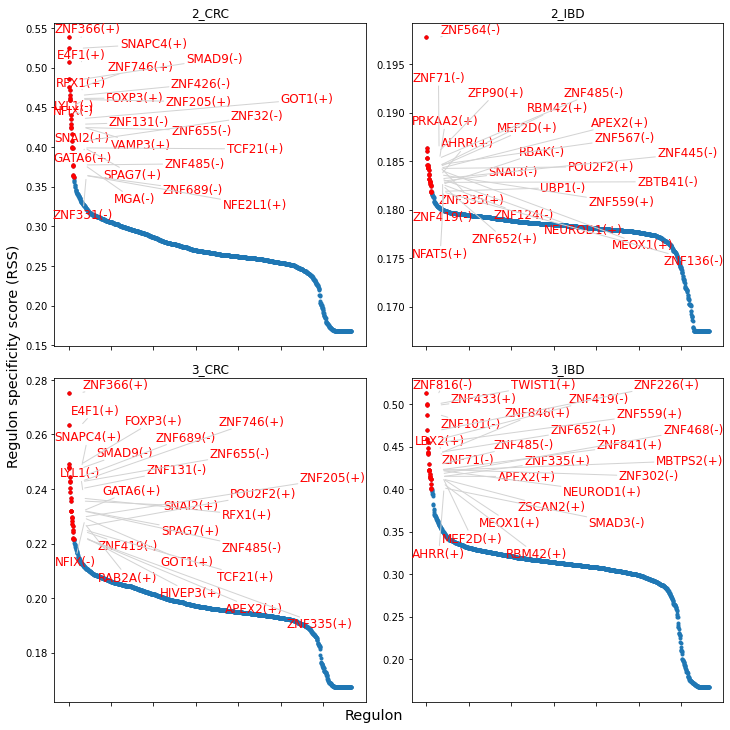

In [83]:
from adjustText import adjust_text
cats = sorted(list(set(rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "2_IBD") | (rss_cellType_tmp3.index == "2_CRC") | (rss_cellType_tmp3.index == "3_IBD") | (rss_cellType_tmp3.index == "3_CRC")].index)))
fig = plt.figure(figsize=(10, 10))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "2_IBD") | (rss_cellType_tmp3.index == "2_CRC") | (rss_cellType_tmp3.index == "3_IBD") | (rss_cellType_tmp3.index == "3_CRC")].T[c]
    ax = fig.add_subplot(2,2,num)
    plot_rss(rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "2_IBD") | (rss_cellType_tmp3.index == "2_CRC") | (rss_cellType_tmp3.index == "3_IBD") | (rss_cellType_tmp3.index == "3_CRC")], c, top_n=25, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("/home/spuccio/data/regulon_imputed_C2_3.pdf", dpi=600, bbox_inches = "tight")
plt.show()

### Cluster 4 - 5

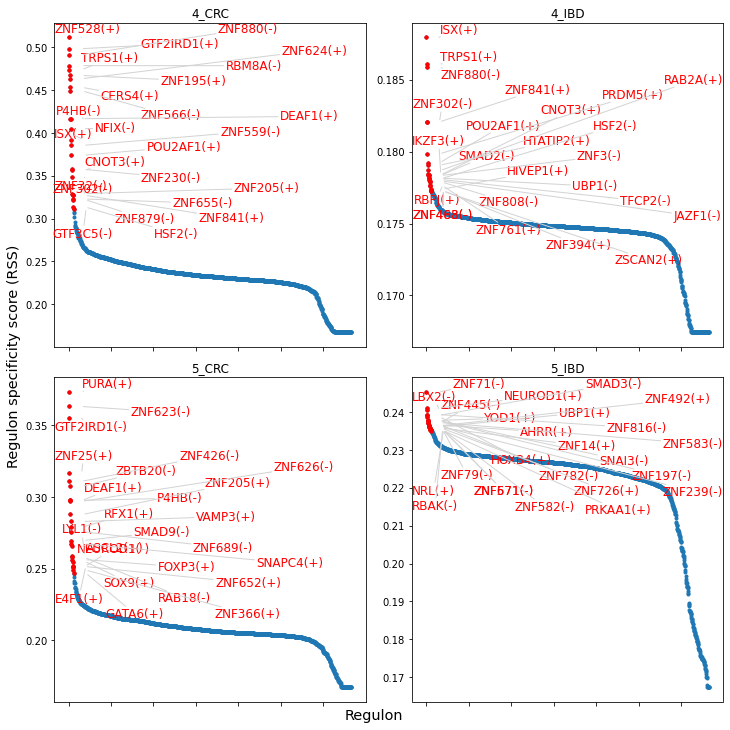

In [84]:
from adjustText import adjust_text
cats = sorted(list(set(rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "4_IBD") | (rss_cellType_tmp3.index == "4_CRC") | (rss_cellType_tmp3.index == "5_IBD") | (rss_cellType_tmp3.index == "5_CRC")].index)))
fig = plt.figure(figsize=(10, 10))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "4_IBD") | (rss_cellType_tmp3.index == "4_CRC") | (rss_cellType_tmp3.index == "5_IBD") | (rss_cellType_tmp3.index == "5_CRC")].T[c]
    ax = fig.add_subplot(2,2,num)
    plot_rss(rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "4_IBD") | (rss_cellType_tmp3.index == "4_CRC") | (rss_cellType_tmp3.index == "5_IBD") | (rss_cellType_tmp3.index == "5_CRC")], c, top_n=25, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("/home/spuccio/data/regulon_imputed_C4_5.pdf", dpi=600, bbox_inches = "tight")
plt.show()

### Cluster 6 - 7 

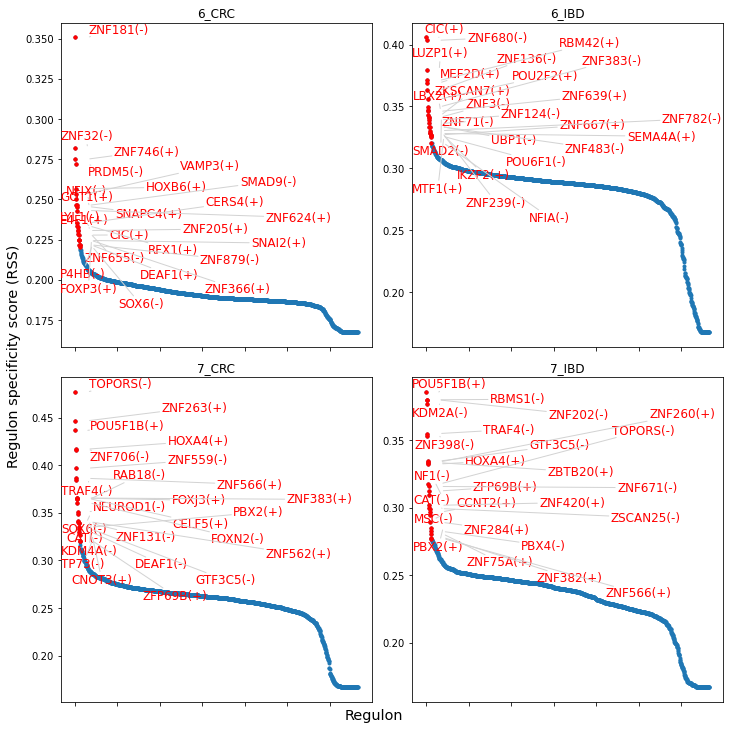

In [85]:
from adjustText import adjust_text
cats = sorted(list(set(rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "6_IBD") | (rss_cellType_tmp3.index == "6_CRC") | (rss_cellType_tmp3.index == "7_IBD") | (rss_cellType_tmp3.index == "7_CRC")].index)))
fig = plt.figure(figsize=(10, 10))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "6_IBD") | (rss_cellType_tmp3.index == "6_CRC") | (rss_cellType_tmp3.index == "7_IBD") | (rss_cellType_tmp3.index == "7_CRC")].T[c]
    ax = fig.add_subplot(2,2,num)
    plot_rss(rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "6_IBD") | (rss_cellType_tmp3.index == "6_CRC") | (rss_cellType_tmp3.index == "7_IBD") | (rss_cellType_tmp3.index == "7_CRC")], c, top_n=25, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("/home/spuccio/data/regulon_imputed_C6_7.pdf", dpi=600, bbox_inches = "tight")
plt.show()

In [107]:
colnames =  tmp1.columns

In [108]:
colnames

Index(['ACAA1(-)', 'ACO1(+)', 'ADNP2(-)', 'AEBP2(+)', 'AEBP2(-)', 'AHCTF1(+)',
       'AHR(+)', 'AHR(-)', 'AHRR(+)', 'AHRR(-)',
       ...
       'ZSCAN29(+)', 'ZSCAN29(-)', 'ZSCAN30(+)', 'ZSCAN30(-)', 'ZSCAN9(+)',
       'ZXDA(+)', 'ZXDA(-)', 'ZXDB(-)', 'ZXDC(+)', 'ZXDC(-)'],
      dtype='object', length=1474)

In [109]:
import re

In [110]:
colnames.str.contains('-', flags=re.IGNORECASE, regex=True)

array([ True, False,  True, ...,  True, False,  True])

In [121]:
tmp1.loc[:, colnames.str.contains('-', flags=re.IGNORECASE, regex=True)]

,ACAA1(-),ADNP2(-),AEBP2(-),AHR(-),AHRR(-),ARID3A(-),ARNT(-),ARNT2(-),ARNTL(-),ARNTL2(-),...,ZRSR2(-),ZSCAN12(-),ZSCAN2(-),ZSCAN21(-),ZSCAN25(-),ZSCAN29(-),ZSCAN30(-),ZXDA(-),ZXDB(-),ZXDC(-)
desc_0.6,,,,,,,,,,,,,,,,,,,,,
3,0.107589,0.009087,0.010231,0.030211,0.061701,0.066900,0.084703,0.008062,0.055490,0.034204,...,0.080254,0.053378,0.071568,0.055740,0.003071,0.0,0.024699,0.009424,0.0,0.031614
1,0.134034,0.013761,0.011960,0.033037,0.084581,0.074108,0.088218,0.009857,0.068509,0.040993,...,0.091352,0.056093,0.086002,0.047580,0.000581,0.0,0.027926,0.007910,0.0,0.018837
3,0.113638,0.008474,0.015845,0.034015,0.064361,0.064828,0.075382,0.011471,0.057713,0.038018,...,0.064809,0.056708,0.071781,0.046796,0.000885,0.0,0.025357,0.012287,0.0,0.025489
1,0.118469,0.007721,0.025974,0.035922,0.074162,0.061069,0.066156,0.012756,0.062073,0.040947,...,0.064842,0.054710,0.073625,0.044398,0.005588,0.0,0.022196,0.014613,0.0,0.021142
3,0.108880,0.008806,0.010434,0.029787,0.049634,0.060212,0.079383,0.009137,0.047767,0.031612,...,0.086083,0.056554,0.069227,0.070032,0.002158,0.0,0.023777,0.010575,0.0,0.027333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.121475,0.009699,0.028496,0.036603,0.077218,0.064031,0.070280,0.012937,0.062150,0.040855,...,0.072812,0.052047,0.077278,0.041033,0.009350,0.0,0.026016,0.012366,0.0,0.022459
3,0.101337,0.023356,0.021255,0.024620,0.042772,0.049917,0.060002,0.010576,0.042059,0.027926,...,0.073108,0.042826,0.058233,0.063993,0.000000,0.0,0.025160,0.015442,0.0,0.024172
5,0.114947,0.010452,0.026646,0.032948,0.069328,0.062626,0.065377,0.012226,0.057841,0.038991,...,0.068860,0.047539,0.074334,0.042739,0.006252,0.0,0.026411,0.016018,0.0,0.024172


In [133]:
tmp1.loc[:, tmp1.columns.str.contains(r'[+]', flags=re.IGNORECASE, regex=True)]

,ACO1(+),AEBP2(+),AHCTF1(+),AHR(+),AHRR(+),APEX2(+),ARID3A(+),ARID5B(+),ARNT(+),ARNT2(+),...,ZNF93(+),ZRSR2(+),ZSCAN16(+),ZSCAN2(+),ZSCAN21(+),ZSCAN29(+),ZSCAN30(+),ZSCAN9(+),ZXDA(+),ZXDC(+)
desc_0.6,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.064822,0.0,0.043323,0.010149,0.113140,0.003006,0.276625,0.010137,0.053525,...,0.017444,0.0,0.0,0.018880,0.0,0.0,0.042462,0.0,0.039685,0.062681
1,0.0,0.057722,0.0,0.041091,0.004011,0.039834,0.005147,0.269710,0.007365,0.051134,...,0.041564,0.0,0.0,0.002559,0.0,0.0,0.051779,0.0,0.061319,0.062146
3,0.0,0.054587,0.0,0.033519,0.006743,0.066667,0.006716,0.225911,0.009942,0.046388,...,0.033618,0.0,0.0,0.014315,0.0,0.0,0.042726,0.0,0.043586,0.057305
1,0.0,0.055970,0.0,0.023881,0.004011,0.000830,0.005173,0.115260,0.010645,0.043020,...,0.034663,0.0,0.0,0.000000,0.0,0.0,0.040488,0.0,0.053906,0.048221
3,0.0,0.061411,0.0,0.042080,0.008835,0.074136,0.003431,0.279391,0.011302,0.049953,...,0.013747,0.0,0.0,0.021577,0.0,0.0,0.039721,0.0,0.032663,0.062021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.0,0.055970,0.0,0.028407,0.006535,0.000000,0.004455,0.072845,0.010878,0.044123,...,0.037203,0.0,0.0,0.000000,0.0,0.0,0.045769,0.0,0.064971,0.064787
3,0.0,0.065376,0.0,0.028687,0.011255,0.087690,0.005120,0.218995,0.015346,0.042442,...,0.011615,0.0,0.0,0.023444,0.0,0.0,0.031070,0.0,0.028833,0.050453
5,0.0,0.056708,0.0,0.023286,0.008109,0.023790,0.003870,0.123098,0.012263,0.043926,...,0.032334,0.0,0.0,0.000000,0.0,0.0,0.041368,0.0,0.056921,0.053753


array([False,  True, False, ..., False,  True, False])

In [127]:
tmp1

,ACAA1(-),ACO1(+),ADNP2(-),AEBP2(+),AEBP2(-),AHCTF1(+),AHR(+),AHR(-),AHRR(+),AHRR(-),...,ZSCAN29(+),ZSCAN29(-),ZSCAN30(+),ZSCAN30(-),ZSCAN9(+),ZXDA(+),ZXDA(-),ZXDB(-),ZXDC(+),ZXDC(-)
desc_0.6,,,,,,,,,,,,,,,,,,,,,
3,0.107589,0.0,0.009087,0.064822,0.010231,0.0,0.043323,0.030211,0.010149,0.061701,...,0.0,0.0,0.042462,0.024699,0.0,0.039685,0.009424,0.0,0.062681,0.031614
1,0.134034,0.0,0.013761,0.057722,0.011960,0.0,0.041091,0.033037,0.004011,0.084581,...,0.0,0.0,0.051779,0.027926,0.0,0.061319,0.007910,0.0,0.062146,0.018837
3,0.113638,0.0,0.008474,0.054587,0.015845,0.0,0.033519,0.034015,0.006743,0.064361,...,0.0,0.0,0.042726,0.025357,0.0,0.043586,0.012287,0.0,0.057305,0.025489
1,0.118469,0.0,0.007721,0.055970,0.025974,0.0,0.023881,0.035922,0.004011,0.074162,...,0.0,0.0,0.040488,0.022196,0.0,0.053906,0.014613,0.0,0.048221,0.021142
3,0.108880,0.0,0.008806,0.061411,0.010434,0.0,0.042080,0.029787,0.008835,0.049634,...,0.0,0.0,0.039721,0.023777,0.0,0.032663,0.010575,0.0,0.062021,0.027333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.121475,0.0,0.009699,0.055970,0.028496,0.0,0.028407,0.036603,0.006535,0.077218,...,0.0,0.0,0.045769,0.026016,0.0,0.064971,0.012366,0.0,0.064787,0.022459
3,0.101337,0.0,0.023356,0.065376,0.021255,0.0,0.028687,0.024620,0.011255,0.042772,...,0.0,0.0,0.031070,0.025160,0.0,0.028833,0.015442,0.0,0.050453,0.024172
5,0.114947,0.0,0.010452,0.056708,0.026646,0.0,0.023286,0.032948,0.008109,0.069328,...,0.0,0.0,0.041368,0.026411,0.0,0.056921,0.016018,0.0,0.053753,0.024172
